#**Importing Tools**

In [1]:
import numpy as np
import os
from PIL import Image
import tensorflow as tf
import tensorflow_datasets as tfds

#**Preprocessing data**

In [2]:
import pathlib
dataset_url = "file:///content/drive/MyDrive/kaggle/D_v_C_Dataset/train.zip"
archive = tf.keras.utils.get_file(origin=dataset_url, extract=True)
data_dir = pathlib.Path(archive).with_suffix('')

In [3]:
batch_size = 128
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  color_mode="rgb",
  validation_split=0.2,
  subset="training",
  seed=123,
  shuffle=True,
  image_size=(227, 227),
  batch_size=batch_size)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.


In [4]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  color_mode="rgb",
  validation_split=0.2,
  subset="validation",
  seed=123,
  shuffle=True,
  image_size=(227, 227),
  batch_size = batch_size)
val_ds = val_ds.shuffle(100, reshuffle_each_iteration=True)

Found 25000 files belonging to 2 classes.
Using 5000 files for validation.


In [5]:
class_names = train_ds.class_names
print(class_names)

['cat', 'dog']


#**Vizualizing data**

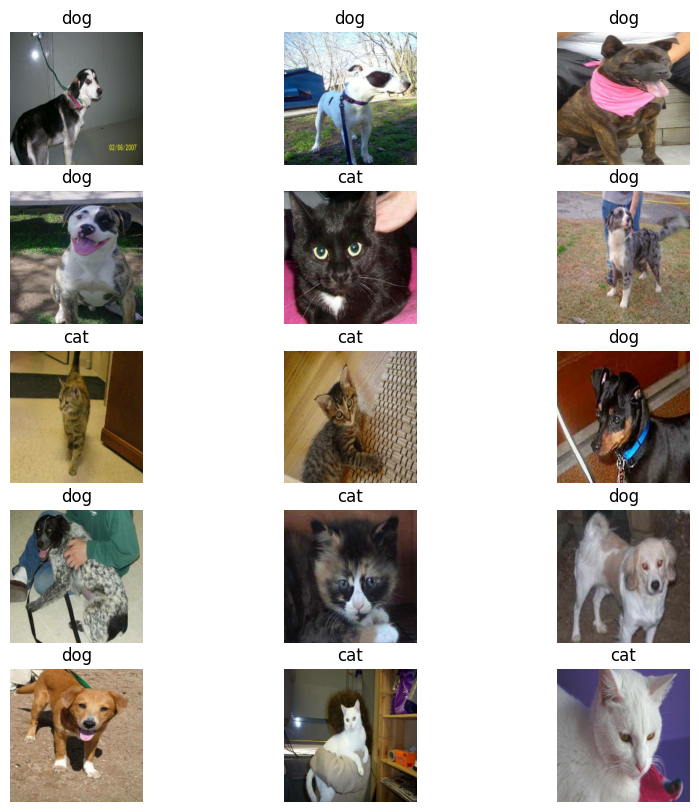

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(15):
    ax = plt.subplot(5, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

#**Building and compiling the model**

In [ ]:
model = tf.keras.models.Sequential()  #AlexNet architecture


model.add(tf.keras.layers.Conv2D(96,
                                 kernel_size = 11,
                                 strides = 4,
                                 activation = "relu",
                                 input_shape=(227,227,3)))
model.add(tf.keras.layers.MaxPool2D(pool_size = (3,3), strides = 2))
model.add(tf.keras.layers.BatchNormalization())


model.add(tf.keras.layers.Conv2D(256,
                                 kernel_size = 5,
                                 activation = "relu",
                                 padding = "same"))
model.add(tf.keras.layers.MaxPool2D(pool_size = (3,3), strides = 2))
model.add(tf.keras.layers.BatchNormalization())


model.add(tf.keras.layers.Conv2D(384,
                                 kernel_size = 3,
                                 activation = "relu",
                                 padding = "same"))
model.add(tf.keras.layers.BatchNormalization())


model.add(tf.keras.layers.Conv2D(384,
                                 kernel_size = 3,
                                 activation = "relu",
                                 padding = "same"))
model.add(tf.keras.layers.BatchNormalization())


model.add(tf.keras.layers.Conv2D(256,
                                 kernel_size = 3,
                                 activation = "relu",
                                 padding = "same"))
model.add(tf.keras.layers.MaxPool2D(pool_size = (3,3), strides = 2))
model.add(tf.keras.layers.BatchNormalization())


model.add(tf.keras.layers.Flatten())


model.add(tf.keras.layers.Dense(4096,
                                activation = "relu",))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.BatchNormalization())


model.add(tf.keras.layers.Dense(4096,
                                activation = "relu",))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.BatchNormalization())


model.add(tf.keras.layers.Dense(1000,
                                activation = "relu",))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.BatchNormalization())


model.add(tf.keras.layers.Dense(1, activation = "sigmoid"))



model.summary()

model.compile(optimizer = tf.keras.optimizers.Adam(0.001),
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2  (None, 27, 27, 96)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 27, 27, 96)        384       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 256)       0         
 g2D)                                                            
                                                        

In [ ]:
model.fit(train_ds,
          epochs=100,
          validation_data = val_ds,
          shuffle = True
)
model.save("/content/drive/MyDrive/Models/Cat_vs_Dogs_model")

Epoch 1/100
157/157 [==============================] - 55s 301ms/step - loss: 0.7619 - accuracy: 0.6082 - val_loss: 3.7645 - val_accuracy: 0.5370
Epoch 2/100
157/157 [==============================] - 49s 308ms/step - loss: 0.5766 - accuracy: 0.7022 - val_loss: 0.7790 - val_accuracy: 0.5668
Epoch 3/100
157/157 [==============================] - 46s 289ms/step - loss: 0.4640 - accuracy: 0.7817 - val_loss: 0.7667 - val_accuracy: 0.5988
Epoch 4/100
157/157 [==============================] - 46s 287ms/step - loss: 0.3882 - accuracy: 0.8230 - val_loss: 0.5191 - val_accuracy: 0.7692
Epoch 5/100
157/157 [==============================] - 46s 289ms/step - loss: 0.3131 - accuracy: 0.8622 - val_loss: 0.9130 - val_accuracy: 0.6858
Epoch 6/100
157/157 [==============================] - 47s 292ms/step - loss: 0.2685 - accuracy: 0.8842 - val_loss: 1.2947 - val_accuracy: 0.5310
Epoch 7/100
157/157 [==============================] - 48s 298ms/step - loss: 0.2374 - accuracy: 0.8995 - val_loss: 0.5874 -

#**Visualizing wrong predictions**

In [7]:
model = tf.keras.models.load_model("/content/drive/MyDrive/Models/Cat_vs_Dogs_model")
model.evaluate(val_ds)

40/40 [==============================] - 15s 76ms/step - loss: 0.4582 - accuracy: 0.9184


[0.4582054615020752, 0.91839998960495]

In [63]:
wrong_images = []
wrong_labels = []
for images,labels in val_ds.take(8): #Taking 8 batches
  for image,label in zip(images,labels):
    img = np.expand_dims(image,  axis=0)
    pred_label = model.predict(img, verbose = 0)
    if round(pred_label[0][0]) != label.numpy():
      wrong_images.append(image)
      wrong_labels.append(round(pred_label[0][0]))

In [65]:
wrong_images = np.array(wrong_images)
wrong_images.shape  #81 wrong images from 8/40 batches

(94, 227, 227, 3)

In [66]:
rows = 24
col = 4
fig = plt.figure(figsize=(20, 20))
fig.set_size_inches(10, 70, forward=True)
for i,image in enumerate(wrong_images):
    fig.add_subplot(rows, col, i+1)
    plt.imshow(image.astype(np.uint8))
    plt.axis("off")
    plt.title(class_names[wrong_labels[i]])

Output hidden; open in https://colab.research.google.com to view.

#**Predicting cats from my phone**

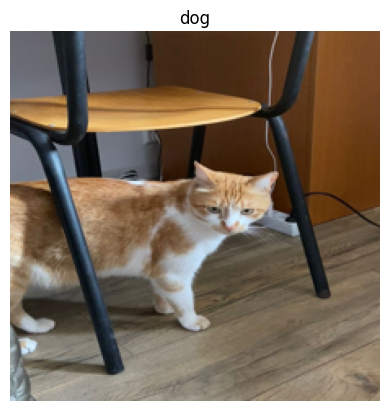

In [92]:
from PIL import Image
img = Image.open(r"/content/drive/MyDrive/cats/cat1.jpeg")
img = img.resize((227, 227))
img_array = tf.keras.utils.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
prediction = model.predict(img_array, verbose = 0)
img_array = np.resize(img_array, (227,227,3))
plt.title(class_names[round(prediction[0][0])])
plt.axis("off")
plt.imshow(img_array.astype(np.uint8));

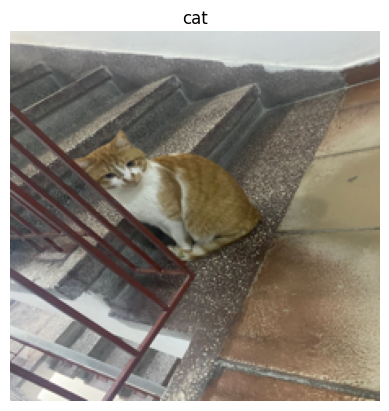

In [93]:
img = Image.open(r"/content/drive/MyDrive/cats/cat2.jpeg")
img = img.resize((227, 227))
img_array = tf.keras.utils.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
prediction = model.predict(img_array, verbose = 0)
img_array = np.resize(img_array, (227,227,3))
plt.title(class_names[round(prediction[0][0])])
plt.axis("off")
plt.imshow(img_array.astype(np.uint8));

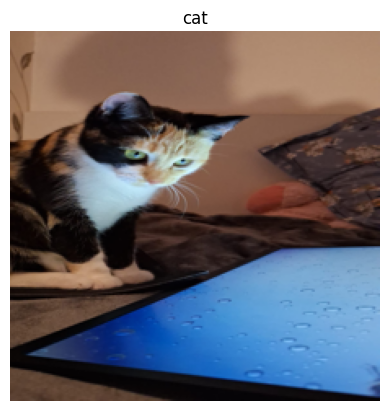

In [94]:
img = Image.open(r"/content/drive/MyDrive/cats/cat10.jpeg")
img = img.resize((227, 227))
img_array = tf.keras.utils.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
prediction = model.predict(img_array, verbose = 0)
img_array = np.resize(img_array, (227,227,3))
plt.title(class_names[round(prediction[0][0])])
plt.axis("off")
plt.imshow(img_array.astype(np.uint8));

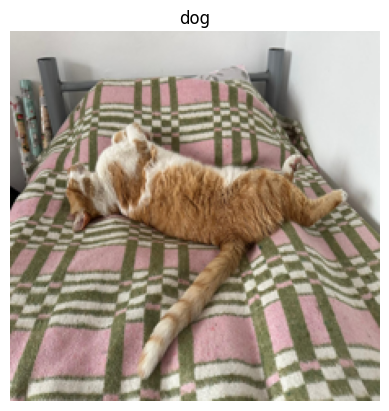

In [95]:
img = Image.open(r"/content/drive/MyDrive/cats/cat6.jpeg")
img = img.resize((227, 227))
img_array = tf.keras.utils.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
prediction = model.predict(img_array, verbose = 0)
img_array = np.resize(img_array, (227,227,3))
plt.title(class_names[round(prediction[0][0])])
plt.axis("off")
plt.imshow(img_array.astype(np.uint8));

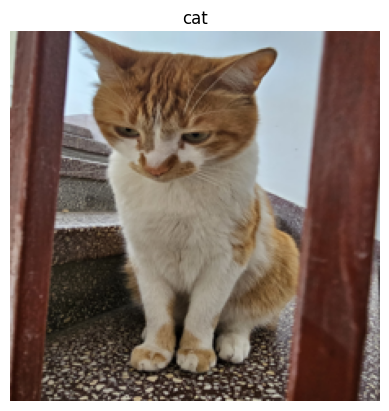

In [96]:
img = Image.open(r"/content/drive/MyDrive/cats/cat7.jpeg")
img = img.resize((227, 227))
img_array = tf.keras.utils.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
prediction = model.predict(img_array, verbose = 0)
img_array = np.resize(img_array, (227,227,3))
plt.title(class_names[round(prediction[0][0])])
plt.axis("off")
plt.imshow(img_array.astype(np.uint8));

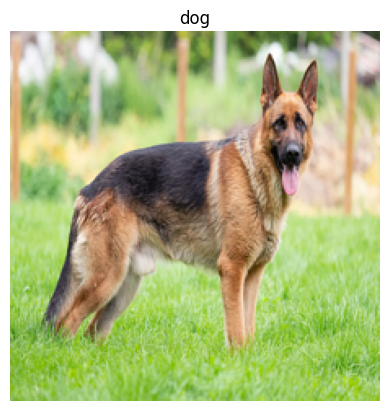

In [97]:
img = Image.open(r"/content/drive/MyDrive/cats/dog1.jpg")
img = img.resize((227, 227))
img_array = tf.keras.utils.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
prediction = model.predict(img_array, verbose = 0)
img_array = np.resize(img_array, (227,227,3))
plt.title(class_names[round(prediction[0][0])])
plt.axis("off")
plt.imshow(img_array.astype(np.uint8));